### Salary Hike => Build a prediction model for Salary Hike, Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# Rename Columns
salary =dataset.rename({'YearsExperience':'Years_Ex', 'Salary':'Salary'},axis=1)
salary

,Years_Ex,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualization

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Years_Ex  30 non-null     float64
 1   Salary    30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='Years_Ex', ylabel='Density'>

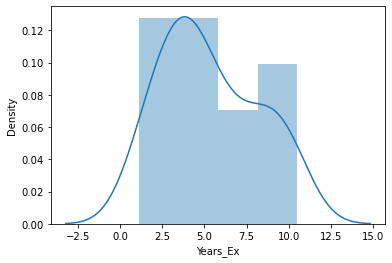

In [6]:
sns.distplot(salary['Years_Ex'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

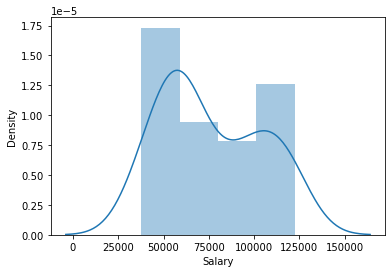

In [7]:
sns.distplot(salary['Salary'])

## Correlation Analysis

In [9]:
salary.corr()

,Years_Ex,Salary
Years_Ex,1.000000,0.978242
Salary,0.978242,1.000000


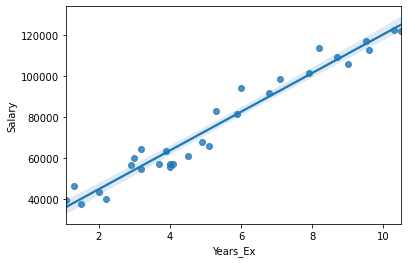

In [10]:
sns.regplot(x=salary['Years_Ex'],y=salary['Salary']);

## Model Building

In [14]:
model=smf.ols('Salary~Years_Ex',data=salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        11:40:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_Ex    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Coefficients
model.params

Intercept    25792.200199
Years_Ex      9449.962321
dtype: float64

In [16]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
Years_Ex     24.950094
dtype: float64 
 Intercept    5.511950e-12
Years_Ex     1.143068e-20
dtype: float64


In [17]:
# R-squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## Predict for new data

In [18]:
# Manual Pradiction for 4.8 Years Experience
salary= (25792.200199) + (9449.962321)*(4.8)
salary

71152.0193398

In [19]:
# Automatic prediction for 3.2 and 4.8 Years Experience
new_data= pd.Series([3.2,4.8])
new_data

0    3.2
1    4.8
dtype: float64

In [20]:
salary_pred=pd.DataFrame(new_data,columns=['Years_Ex'])
salary_pred

,Years_Ex
0,3.2
1,4.8


In [21]:
model.predict(salary_pred)

0    56032.079627
1    71152.019342
dtype: float64

In [25]:
# Prediction of the data
dataset['Predicted']=model.fittedvalues
dataset

,YearsExperience,Salary,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
